## Etape n°2: Construction d'un graphe

+ Classe `Node`
+ Class `Graph`
+ méthodes: 
    + `create_graph_components(k)`
    + `make_graph()`
    + `make_dist_matrix(df)`
    + `generate_csv(G, df, indexes)`

In [5]:
import os
os.chdir("/Users/sophierossi/Desktop/optim_livraison-master/images")
from IPython.display import Image

### Class Node
+ classe générique pour créer tous les noeuds du graphe
+ initialisée avec les attributs: latitude, longitude, identifiant (unique), liste d'enfants
+ ses classes filles sont celles qui constituent le `Graph`: `Client`, `Colis`, `Garage`, `Entrepot`
+ méthode: `new_child` pour ajouter un noeud enfant à la liste des enfants

In [2]:
class Node:
    def __init__(self, lat : float, long : float):
        self.id = uuid4()
        self.lat = lat
        self.long = long
        self.children = [] 

In [3]:
class Colis(Node):
    def __init__(self, size: int, entrepot, destination):
        self.size = size
        self.entrepot = entrepot
        self.client = make_client(destination[0], destination[1], size) # les clients sont créés à partir des colis

class Garage(Node):   
    def __init__(self, lat: float, long: float, nb_camions: int, nb_legers: int):
        self.nb_camions = nb_camions
        self.nb_legers = nb_legers

class Entrepot(Node):
    def __init__(self, lat : float, long : float, max_camions : int, max_legers: int, capacite : int):
        self.max_camions = max_camions
        self.max_legers = max_legers
        self.capacite = capacite

## Classe Graph

+ constitue le squelette du réseau de livraison
+ 3 générations:
    + garage: racine
    + entrepots: enfants du garage
    + clients: enfants des entrepots et les enfants d'un meme entrepot sont enfants entre eux

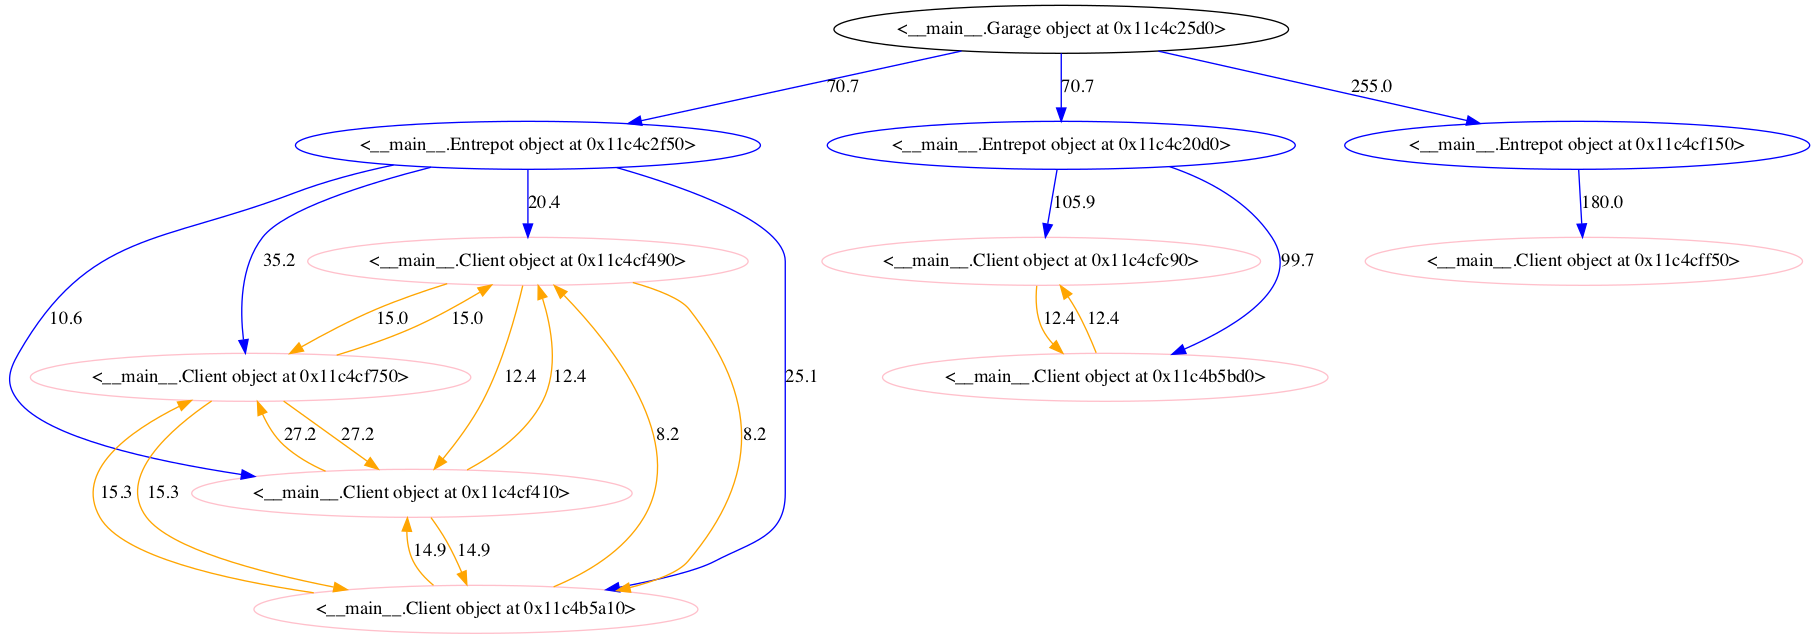

In [6]:
Image(filename = "graphe_exemple.png")

## Construction

0. Créer un garage

1. Appeler la méthode `create_graph_components(nbr_clients)`: à partir des fichiers générés par la fonction `random_clients(nbre_clients)`, construit les entrepots, les colis (de taille aléatoire) et les clients

2. Appeler la méthode `make_graph()`: à partir du garage, des entrepots et des colis crée la structure décrite précédemment

3. Appeler la méthode `make_dist_matrix(df)`: elle appelle la méthode `itineraries` qui génère la matrice des distances, ainsi que les coordonnées de chaque point et les itinéraires

4. Appeler la méthode `generate_csv(G, df, indexes)`: crée les fichiers csv qui serviront en entrée de l'algorithme d'optimisation

In [8]:
# exemple

g = Garage (2.2728354, 48.8281142997349, 40, 60)
c = Camion(50, 0, 10000) # sera utile pour l'algorithme d'optimisation
k = 50 # chosir un nombre de clients

df, indexes, warehouses, parcels = create_graph_components(k)

G = Graph(g, warehouses, parcels, c)
G.make_graph()
G.make_dist_matrix(df)
generate_csv(G, df, indexes)

NameError: name 'Camion' is not defined

<ins>NB</ins>:

+ Le graphe peut etre créé sans matrice de distances
+ Dans ce cas: distance euclidienne